In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
#import dataset
ds= pd.read_csv('ecommerce_regression_dataset.csv')
ds

,Ad_Spend,Product_Price,Discount,Category,Weekly_Sales
0,11476,1228,5,Home,436
1,4657,1285,10,Home,360
2,9935,1178,25,Electronics,444
3,4582,1476,5,Home,322
4,11647,2436,25,Electronics,449
5,5557,1013,12,Home,373
6,5552,1318,15,Fashion,377
7,7224,1198,20,Fashion,436
8,14223,1088,30,Home,525
9,7201,1161,18,Home,413


In [31]:
ds.columns

Index(['Ad_Spend', 'Product_Price', 'Discount', 'Category', 'Weekly_Sales'], dtype='object')

In [32]:
#splitting dataset into Independent and Dependent variables
x=ds[['Ad_Spend', 'Product_Price', 'Discount', 'Category']]
y=ds[['Weekly_Sales']]

In [33]:
#perform OneHotEncoding on categorical column ('category')
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse_output=False)
endata= ohe.fit_transform(x[['Category']])
endata

column_name= ohe.get_feature_names_out(['Category'])
endf= pd.DataFrame(endata, columns=column_name)
endf

x=pd.concat([x,endf], axis=1)
x

x=x.drop(columns=['Category'])
x

,Ad_Spend,Product_Price,Discount,Category_Electronics,Category_Fashion,Category_Home
0,11476,1228,5,0.0,0.0,1.0
1,4657,1285,10,0.0,0.0,1.0
2,9935,1178,25,1.0,0.0,0.0
3,4582,1476,5,0.0,0.0,1.0
4,11647,2436,25,1.0,0.0,0.0
5,5557,1013,12,0.0,0.0,1.0
6,5552,1318,15,0.0,1.0,0.0
7,7224,1198,20,0.0,1.0,0.0
8,14223,1088,30,0.0,0.0,1.0
9,7201,1161,18,0.0,0.0,1.0


In [34]:
#splitting dataset with training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor(random_state=1)
reg.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [36]:
y_pred= reg.predict(x_test)
y_pred

array([434., 512., 281., 426., 436., 251., 351., 434., 393., 350.])

In [37]:
y_test

,Weekly_Sales
27,449
35,511
40,272
38,486
2,444
3,322
48,379
29,464
46,437
31,366


In [38]:
from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.7516475893166841

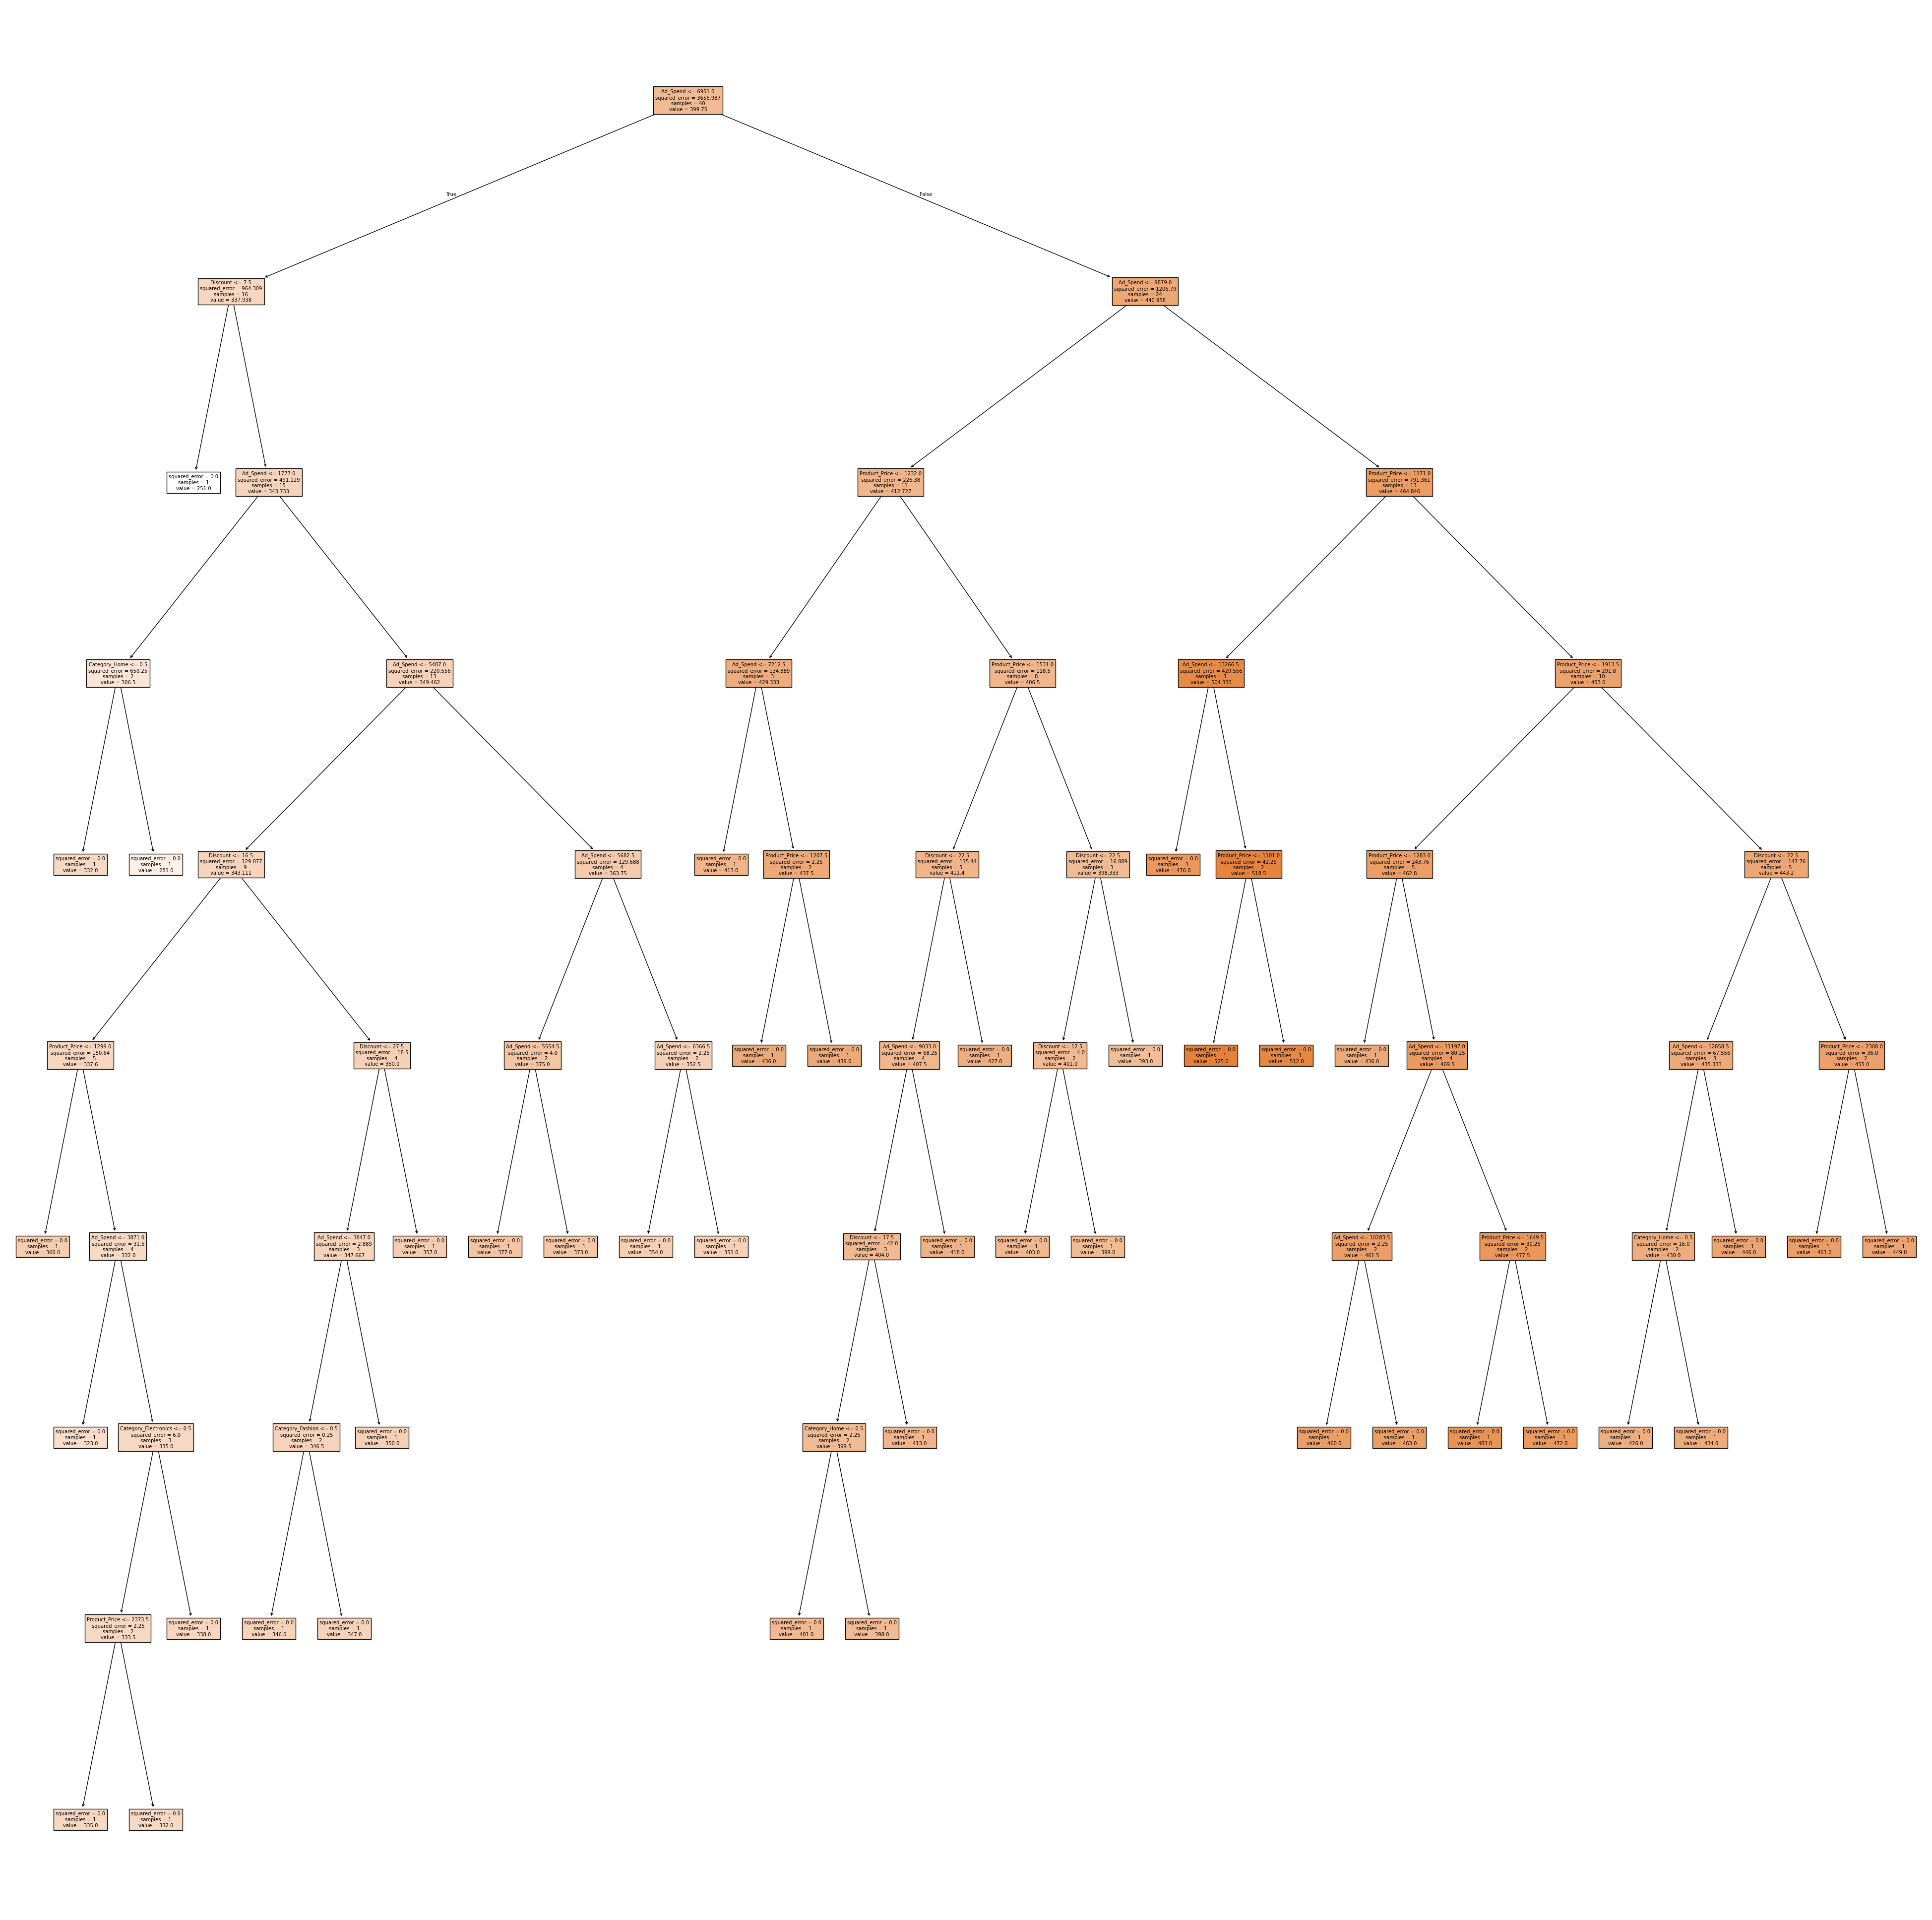

In [40]:

from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(reg, feature_names=x.columns, filled=True)
plt.show()